In [ ]:
import tensorflow
import numpy as np
import pandas as pd

# text processing libraries
import re
import string
import nltk
from nltk.corpus import stopwords

# matplotlib and seaborn for plotting
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")


# Uploading train set and test set

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#Importing data
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/MixedTunToxDataset.csv')
data.head()


,text,label
0,ماسيت لاسيت,1
1,بالاهي علاش شبيها رزينا انترنت كل يوم يقصلي مد...,1
2,yarhmou babah mai 3ana erjel wa3lihoum leklem ...,0
3,تكره زك ال خامج يا ناتن تو انتم رابارة يا فرات...,1
4,mabrouk entisar nahna 3ach efri9i 3ach cha3bha...,0


In [ ]:
#Splitting Data
from sklearn.model_selection import train_test_split
X=data.drop('label', axis=1)
y=data['label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
file_path = '/content/drive/My Drive/Colab Notebooks/tunbert_test.csv'

# Save the DataFrame to a CSV file
tunbert_test.to_csv(file_path, index=False)

In [ ]:
print('Train data shape: ', X_train.shape ,"and test data shape is",X_test.shape)

Train data shape:  (95664, 1) and test data shape is (23916, 1)


In [ ]:
data.shape,X_train.shape,X_test.shape,y_train.shape,y_test.shape

((119580, 2), (95664, 1), (23916, 1), (95664,), (23916,))

In [ ]:
X_train.sample(15,random_state=1)

,text
33518,mahlek
72066,وقتاه مرويح انشاءالله ه
64,yeheb yepirati fcb yeji prv
30436,الماء سخون برشا
29210,راك تقتل يا نجلة لا بلوس بالي افير تون رال اوس...
78083,hasbouna ilah w n3am alwakil
3840,3atek 3asba
47628,برا نيك سليم رياحي
47102,parie ifoutich minutes sahni
4077,انا نقليك راكيز معا جمعية و سيب عليك مي كلاب ت...


In [ ]:
X_test.sample(15,random_state=1)

,text
94557,برافو ناجي جلول ميل برافو
2338,tmaredh coulira
24546,منور
31072,سلومة منور سا و موهر يا غالي اما بالحق شفلنا ح...
48292,هاذي وقتاش
114523,intidebet jdod
72252,nahdhaoui maset
117559,tbanderlou t9olou ykhalik nheb n9olha 9ofa 9ad...
36865,مجموعة مالشلايك حاشا مرت سفيان
118795,araftha aka tebda 5ra lrasek t9olhom jawi behy


In [ ]:
X_train.head()

,text
101542,هوا خدم حاجة عمل مجهود باهيا خايبة ناس تحكم ان...
29306,3leha hsine gandoura zebi joueret fin contrat ...
27851,الزب احنى في من او صلنا كوم و هوما في جور في ك...
960,maniktha welamar jiran
33331,عندك كلمة على روحك موش على توانس لكل واللي قبل...


In [ ]:
y_train.head()

101542    0
29306     1
27851     1
960       1
33331     0
Name: label, dtype: int64

# Data Visualisation

In [ ]:
# negative comments
negative_dialect = X_train[y_train==1]['text']
negative_dialect.values[3]

'yazina chlayk'

In [ ]:

# positive comments
positive_dialect = X_train[y_train==0]['text']
positive_dialect.values[6]

'كي فوزي راك خالي ارجع ليل مزويد و خاني حاجة الي تحبها اما ما تخلينش ضيعين راهو حطاهنا عندنا حاك عليك امعلم ب ب معلم والله من اجمل اصوات برافو فوزي'

In [ ]:
#Distribution of the label Column
print(y_train.value_counts())
#not a good distribution

label
0    57818
1    37846
Name: count, dtype: int64


<Axes: xlabel='label', ylabel='count'>

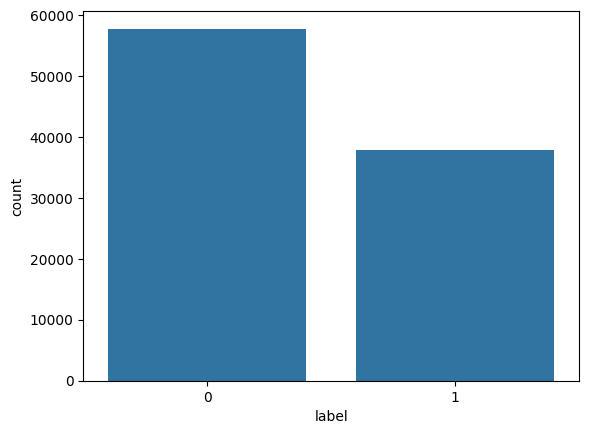

In [ ]:
#Using seaborn to visualize the distribution of the label Column
sns.barplot(y_train.value_counts())

# data preprocessing

In [ ]:
#Missing values
X_train.isnull().sum()
#--> No missing values

text    0
dtype: int64

In [ ]:

aux = pd.DataFrame()
aux['text'] = X_train['text']
aux['label'] = y_train

In [ ]:
aux_test = pd.DataFrame()
aux_test['text'] = X_test['text']
aux_test['label'] = y_test

In [ ]:
def remove_consec_duplicates(s):
    new_s = ""
    prev = ""
    for c in s:
        if len(new_s) == 0:
            new_s += c
            # print("if 1 new_s",new_s)
            prev = c
            #print("if 1 prev",prev)
        if c == prev and c!="h" and c!="f": # except "h"
            continue
        else:
            new_s += c
            #print("if 2 new_s",new_s)
            prev = c
            #print("if 2 prev",prev)
    return new_s
    # fonction tnaa7i l 7rouuf eli m3awdin consecutivement b khlef caractére h khatrou significatif pour "hhhhhh" qui exprime un sentiment positif parfois

In [ ]:
aux["text"]=aux['text'].apply(lambda x :remove_consec_duplicates(x))
aux_test["text"]=aux_test['text'].apply(lambda x :remove_consec_duplicates(x))

In [ ]:
#train.compare(aux)

In [ ]:
def data_cleaning(text):
    text = text.lower() #Make text lowercase
    text = re.sub('\[.*?\]', '', text) #remove text in square brackets
    text = re.sub('https?://\S+|www\.\S+', '', text) #remove links
    text = re.sub('<.*?>+', '', text) #remove text in <...>
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text) #remove punctuation
    text = re.sub('\n', '', text) #remove end of line character
    text = re.sub('3','a',text)
    text = re.sub('2','a',text)
    text = re.sub('4','dh',text)
    text = re.sub('5','kh',text)
    text = re.sub('7','h',text)
    text = re.sub('9','k',text)
    text = re.sub('8','gh',text)
    return text


In [ ]:
aux.head()

,text,label
101542,هوا خدم حاجة عمل مجهود باهيا خايبة ناس تحكم ان...,0
29306,3leha hsine gandoura zebi joueret fin contrat ...,1
27851,الزب احنى في من او صلنا كوم و هوما في جور في ك...,1
960,maniktha welamar jiran,1
33331,عندك كلمة على روحك موش على توانس لكل والي قبلك...,0


In [ ]:
aux['text'] = aux['text'].apply(lambda x: data_cleaning(x))
aux_test['text'] = aux_test['text'].apply(lambda x: data_cleaning(x))

In [ ]:

aux.head()

,text,label
101542,هوا خدم حاجة عمل مجهود باهيا خايبة ناس تحكم ان...,0
29306,aleha hsine gandoura zebi joueret fin contrat ...,1
27851,الزب احنى في من او صلنا كوم و هوما في جور في ك...,1
960,maniktha welamar jiran,1
33331,عندك كلمة على روحك موش على توانس لكل والي قبلك...,0


In [ ]:
#removing words with a length less than 2
aux["text"] = aux["text"].apply(lambda x: " ".join([w for w in x.split() if len(w)>2]))
aux_test["text"] = X_test["text"].apply(lambda x: " ".join([w for w in x.split() if len(w)>2]))

In [ ]:
#size of vocabulary before and after preprocessing
corpus1 = ' '.join(list(X_train['text']))

print('Number of tokens before normalization:',len(set((corpus1.split(' ')))))

corpus2 = ' '.join(list(aux['text']))

print('Number of tokens after normalization:',len(set((corpus2.split(' ')))))

print("Number of words dropped after normalization and preprocessing is",len(set((corpus1.split(' '))))-len(set((corpus2.split(' ')))))

Number of tokens before normalization: 159467
Number of tokens after normalization: 150823
Number of words dropped after normalization and preprocessing is 8644


# Word cloud

In [ ]:
!pip install wordcloud matplotlib arabic-reshaper python-bidi

In [ ]:
pip install langdetect

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 981.5/981.5 kB 15.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for langdetect: filename=langdetect-1.0.9-py3-none-any.whl size=993227 sha256=8949887291ac590a2e8cfd8334fef9ef3261da025564a73e7dc415d5b4727e90
  Stored in directory: /root/.cache/pip/wheels/95/03/7d/59ea870c70ce4e5a370638b5462a7711ab78fba2f655d05106
Successfully built langdetect


In [ ]:
from arabic_reshaper import reshape
from bidi.algorithm import get_display

In [ ]:
aux.sample(15,random_state=4)

,text,label
98973,أنا حالة رئيس مجلس نواب الشعب يلزم يحلف القسم ...,0
50441,ahla sabir ahla sout,0
54283,rien come avant beaucoup trop long cafe totale...,1
27562,امايمة خريجي صبرين امان,0
45249,rajaelna etijeni belaid nendmou yejael menek,0
70041,yehmikom weyostorkom tounesna elgalia yehmikom...,0
75412,lahkika mchit dernierement smug martine prendr...,0
114967,صراحة لاعب هذا شنوة ريحت طابونة هاذي كثرولها,0
34700,rasmi lihlaybi kimat safk kmilm,0
54998,entoupa sorek,1


In [ ]:
import collections
from collections import Counter

# afficher les mots les plus repétés pour les sentiments positifs
print("les mots les plus repétés pour les commentaire positifs",Counter(" ".join(aux["text"][aux["label"]==0]).split()).most_common(40))

# afficher les mots les plus repétés pour les sentiments négatifs
print("les mots les plus repétés pour les commentaires négatifs",Counter(" ".join(aux["text"][aux["label"]==1]).split()).most_common(40))


les mots les plus repétés pour les commentaire positifs [('bravo', 3655), ('ربي', 3651), ('برافو', 3405), ('على', 2577), ('سليم', 2452), ('الي', 2230), ('اله', 1752), ('انشاءاله', 1615), ('باش', 1536), ('معلم', 1524), ('انا', 1502), ('معاك', 1476), ('كان', 1443), ('تونس', 1388), ('برشا', 1316), ('maalem', 1045), ('واله', 1042), ('اما', 1033), ('فال', 919), ('men', 805), ('راجل', 777), ('ديما', 776), ('انتي', 770), ('عليك', 699), ('موش', 672), ('بربي', 654), ('rabi', 643), ('خير', 642), ('سلومة', 636), ('ilah', 628), ('merci', 609), ('جمعية', 607), ('حتى', 600), ('رياحي', 597), ('هذا', 586), ('ala', 579), ('لاس', 578), ('هاذي', 563), ('ولا', 557), ('شكون', 551)]
les mots les plus repétés pour les commentaires négatifs [('على', 1959), ('الي', 1367), ('كان', 1328), ('maset', 1236), ('تفوه', 926), ('men', 833), ('باش', 822), ('اله', 821), ('مالا', 789), ('ماسط', 770), ('نيك', 757), ('فيه', 735), ('ala', 730), ('تونس', 709), ('واله', 686), ('tfouh', 666), ('ربي', 644), ('موش', 623), ('هذا',

In [ ]:
from collections import Counter
positifs=[]
négatifs=[]
for i in range(80):
    positifs.append((Counter(" ".join(aux["text"][aux["label"]==0]).split()).most_common(80))[i][0])
print(positifs)
for i in range(80):
    négatifs.append((Counter(" ".join(aux["text"][aux["label"]==1]).split()).most_common(80))[i][0])
print(négatifs)



['bravo', 'ربي', 'برافو', 'على', 'سليم', 'الي', 'اله', 'انشاءاله', 'باش', 'معلم', 'انا', 'معاك', 'كان', 'تونس', 'برشا', 'maalem', 'واله', 'اما', 'فال', 'men', 'راجل', 'ديما', 'انتي', 'عليك', 'موش', 'بربي', 'rabi', 'خير', 'سلومة', 'ilah', 'merci', 'جمعية', 'حتى', 'رياحي', 'هذا', 'ala', 'لاس', 'هاذي', 'ولا', 'شكون', 'واء', 'الكل', 'واحد', 'حاجة', 'كلوب', 'khir', 'ناس', 'معا', 'هوا', 'فما', 'ahla', 'فيه', 'بالاهي', 'توا', 'كيما', 'مبروك', 'سامي', 'متع', 'ahsen', 'احسن', 'نحب', 'عليه', 'علاء', 'وال', 'تونسي', 'كيف', 'فيها', 'saha', 'mahlek', 'شعب', 'بال', 'بين', 'mabrouk', 'محلاك', 'جعفور', 'صحة', 'مرسي', 'إلي', 'عام', 'ياسر']
['على', 'الي', 'كان', 'maset', 'تفوه', 'men', 'باش', 'اله', 'مالا', 'ماسط', 'نيك', 'فيه', 'ala', 'تونس', 'واله', 'tfouh', 'ربي', 'موش', 'هذا', 'برا', 'انتي', 'عليك', 'زبي', 'انا', 'سليم', 'حتى', 'فال', 'masta', 'ماصت', 'امك', 'برشا', 'قحبة', 'طحان', 'ولا', 'راك', 'اما', 'عصبة', 'ilah', 'واحد', 'tahan', 'eli', 'متع', 'راجل', 'بربي', 'ملا', 'masit', 'kahba', 'ياسر', 'ت

In [ ]:
from langdetect import detect
def detect_language(text):
  try:
    return detect(text)
  except:
    return None

In [ ]:
aux['language']=aux['text'].apply(detect_language)

In [ ]:
aux.head()

,text,label
101542,هوا خدم حاجة عمل مجهود باهيا خايبة ناس تحكم ان...,0
29306,aleha hsine gandoura zebi joueret fin contrat ...,1
27851,الزب احنى صلنا كوم هوما جور كوم مالا ناس ناري ...,1
960,maniktha welamar jiran,1
33331,عندك كلمة على روحك موش على توانس لكل والي قبلك...,0


In [ ]:
#positive comments
from wordcloud import WordCloud

arabic_positive=positifs['text']
positive_words =" ".join([text for text in positifs])
word_cloud = WordCloud(width=800,height=500,random_state=1,max_font_size=80).generate(positive_words)
plt.figure(figsize=(10,7))
plt.imshow(word_cloud,interpolation="bilinear")
plt.axis("off")
plt.show()

TypeError: list indices must be integers or slices, not str

In [ ]:
#negative comments
from wordcloud import WordCloud
négatifs_words =" ".join([text for text in négatifs])
word_cloud = WordCloud(width=800,height=500,random_state=1,max_font_size=80).generate(négatifs_words)
plt.figure(figsize=(10,7))
plt.imshow(word_cloud,interpolation="bilinear")
plt.axis("off")
plt.show()

# Model

In [ ]:
import torch
if torch.cuda.is_available():
    device = torch.device("cuda")
    print(f'There are {torch.cuda.device_count()} GPU(s) available.')
    print('Device name:', torch.cuda.get_device_name(0))

else:
    print('No GPU available, using the CPU instead.')
    device = torch.device("cpu")

There are 1 GPU(s) available.
Device name: Tesla T4


In [ ]:
labels = aux.label.values
sentences=aux.text.values
labels

array([0, 1, 1, ..., 1, 0, 0])

In [ ]:
labels+=1
labels

array([1, 2, 2, ..., 2, 1, 1])

In [ ]:
y_test

60034     0
40350     1
89192     0
4467      0
119449    0
         ..
56090     1
65060     0
112280    0
34060     0
26386     1
Name: label, Length: 23916, dtype: int64

In [ ]:
import tensorflow as tf
from sklearn.feature_extraction.text import CountVectorizer
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from tensorflow.keras.optimizers import Adam, RMSprop
from keras.utils import to_categorical
from sklearn.utils import resample
from sklearn.utils import shuffle
from keras.layers import Dense, Flatten, LSTM, Dropout, Activation, Embedding, Bidirectional,SpatialDropout1D
from keras import regularizers

In [ ]:
embedding_dim = 128
max_length = 1187
oov_tok = '<OOV>' #  Out of Vocabulary

In [ ]:
tokenizer = Tokenizer(num_words = None, oov_token=oov_tok)
tokenizer.fit_on_texts(aux['text'])
word_index = tokenizer.word_index

In [ ]:
#on X_test
tokenizer.fit_on_texts(aux_test['text'])

In [ ]:


vocab_size = len(word_index) + 1  # Adding 1 for padding token
vocab_size

150824

In [ ]:
word_index

{'<OOV>': 1,
 'على': 2,
 'ربي': 3,
 'bravo': 4,
 'الي': 5,
 'برافو': 6,
 'سليم': 7,
 'كان': 8,
 'اله': 9,
 'باش': 10,
 'تونس': 11,
 'انا': 12,
 'برشا': 13,
 'واله': 14,
 'انشاءاله': 15,
 'men': 16,
 'معاك': 17,
 'معلم': 18,
 'اما': 19,
 'فال': 20,
 'انتي': 21,
 'ala': 22,
 'موش': 23,
 'عليك': 24,
 'maset': 25,
 'فيه': 26,
 'هذا': 27,
 'راجل': 28,
 'حتى': 29,
 'ilah': 30,
 'maalem': 31,
 'مالا': 32,
 'بربي': 33,
 'ولا': 34,
 'ديما': 35,
 'واحد': 36,
 'خير': 37,
 'تفوه': 38,
 'الكل': 39,
 'حاجة': 40,
 'متع': 41,
 'rabi': 42,
 'رياحي': 43,
 'هاذي': 44,
 'توا': 45,
 'لاس': 46,
 'khir': 47,
 'نيك': 48,
 'بالاهي': 49,
 'راك': 50,
 'ناس': 51,
 'جمعية': 52,
 'برا': 53,
 'ماسط': 54,
 'هوا': 55,
 'شكون': 56,
 'فيها': 57,
 'كيف': 58,
 'سامي': 59,
 'واء': 60,
 'سلومة': 61,
 'عليه': 62,
 'فما': 63,
 'ياسر': 64,
 'معا': 65,
 'tfouh': 66,
 'كيما': 67,
 'كلوب': 68,
 'merci': 69,
 'علاء': 70,
 'مال': 71,
 'شعب': 72,
 'وال': 73,
 'eli': 74,
 'بال': 75,
 'زبي': 76,
 'لطفي': 77,
 'امك': 78,
 'تونسي': 79,


In [ ]:
train_sequences = tokenizer.texts_to_sequences(aux['text'])
train_sequences

[[53,
  2830,
  43,
  550,
  5832,
  1207,
  1555,
  50,
  2533,
  12,
  127,
  511,
  13,
  200,
  27,
  1520,
  93,
  10492,
  6402,
  1208,
  7993,
  2831,
  20702,
  12,
  157,
  4584,
  117,
  511,
  890,
  40,
  838,
  15531,
  338,
  13,
  1097,
  10,
  51,
  13933,
  16,
  36,
  6,
  157,
  313],
 [1049, 10493, 9054, 146, 1597, 1004, 2170, 2120, 74888, 74889, 74890, 9055],
 [3303, 112, 74891, 2638, 207, 397, 2638, 30, 50, 5124, 132],
 [74892, 74893, 20703],
 [214, 311, 2, 90, 21, 2, 977, 662, 257, 6087, 1108, 8530],
 [796, 760],
 [43165, 2, 11, 19, 74894, 43166, 15532, 181],
 [24820, 20704],
 [1344, 43167, 74895, 3211],
 [479,
  521,
  1035,
  74896,
  7517,
  74897,
  74898,
  1496,
  1329,
  534,
  1637,
  937,
  74899,
  3137,
  17759,
  74900,
  2121,
  603,
  20705,
  31799,
  11428,
  31800,
  74901,
  6403,
  7517,
  74902],
 [12539, 4585, 2377, 74903, 10494],
 [387,
  47,
  526,
  2903,
  236,
  43168,
  74904,
  43,
  5,
  8531,
  17,
  43169,
  43170,
  118,
  74905,


In [ ]:
X_test_sequences = tokenizer.texts_to_sequences(aux_test['text'])

In [ ]:
max_length = max(len(seq) for seq in train_sequences)
train_data = pad_sequences(train_sequences, maxlen=max_length,padding='post')
train_data

array([[   53,  2830,    43, ...,     0,     0,     0],
       [ 1049, 10493,  9054, ...,     0,     0,     0],
       [ 3303,   112, 74891, ...,     0,     0,     0],
       ...,
       [   89,   727,     0, ...,     0,     0,     0],
       [    6,    78,     0, ...,     0,     0,     0],
       [ 3736,     0,     0, ...,     0,     0,     0]], dtype=int32)

In [ ]:
X_test_padded = pad_sequences(X_test_sequences, maxlen=max_length, padding='post')

In [ ]:
y_test_encoded = to_categorical(y_test)

In [ ]:
features= train_data.shape[1]
features

1187

In [ ]:
max_length

1187

In [ ]:
train_data[3]

array([74892, 74893, 20703, ...,     0,     0,     0], dtype=int32)

In [ ]:
training_label = pd.get_dummies(aux['label']).values
#"jebna label"

In [ ]:
test_label = pd.get_dummies(aux_test['label']).values

In [ ]:
training_label[3]

array([False,  True])

In [ ]:
print(X_train.shape,y_train.shape)
print(X_test.shape,y_test.shape)

(95664, 1) (95664,)
(23916, 1) (23916,)


In [ ]:
from keras import backend as K

def recall_(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall

def precision_(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision

def f1_score(y_true, y_pred):
    precision = precision_(y_true, y_pred)
    recall = recall_(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))

In [ ]:
max_length

1187

In [ ]:
model = Sequential()
model.add(Embedding(vocab_size,embedding_dim ,input_length=max_length))
model.add(SpatialDropout1D(0.2))
model.add(Bidirectional(LSTM(embedding_dim,kernel_regularizer=regularizers.l2(0.01))))
model.add(Dropout(0.5))
model.add(Dense(2,activation='softmax' ))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 1187, 128)         19305472  
                                                                 
 spatial_dropout1d (Spatial  (None, 1187, 128)         0         
 Dropout1D)                                                      
                                                                 
 bidirectional (Bidirection  (None, 256)               263168    
 al)                                                             
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense (Dense)               (None, 2)                 514       
                                                                 
Total params: 19569154 (74.65 MB)
Trainable params: 1956

In [ ]:
optimizer = Adam(learning_rate=0.001)
model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['Accuracy',recall_,precision_,f1_score])

In [ ]:
from keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor='val_loss', patience=2)

In [ ]:
aux.dtypes

text     object
label     int64
dtype: object

In [ ]:
#Validation data
Validation_data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/ValidationMixedTunTox.csv')
Validation_data.head()

,text,label,kfold
0,lghnaya ta3betni galbi youja3ni nasma3ha meme ...,0,4
1,raw7 nike b3id,1,1
2,mast blid nans7ek trena sine7a 5ir,1,1
3,واو,0,3
4,منحط لا تربيه لا ثقافه تو من قلة المسرحيين جاي...,1,0


In [ ]:
X_val=Validation_data['text']
y_val=Validation_data['label']
X_val.size,y_val.size

(10042, 10042)

In [ ]:
validation_sequences = tokenizer.texts_to_sequences(Validation_data['text'])
val_data = pad_sequences(validation_sequences, maxlen=1187,padding='post')
val_label = pd.get_dummies(Validation_data['label']).values
#"jebna label"
val_data[35].shape

(1187,)

In [ ]:
train_data.shape

(95664, 1187)

### Model fitting

In [ ]:
history =model.fit(train_data, training_label, epochs = 3, batch_size=128, validation_split=0.2,verbose=2) #3malna accuracy f1_score recall precision
#history =model.fit(train_data, training_label, epochs = 3, batch_size=128, validation_split=0.2,callbacks=[early_stopping],verbose=2) #3malna accuracy f1_score recall precision

Epoch 1/3
598/598 - 120s - loss: 0.7739 - Accuracy: 0.7497 - recall_: 0.7497 - precision_: 0.7497 - f1_score: 0.7497 - val_loss: 0.3916 - val_Accuracy: 0.8710 - val_recall_: 0.8709 - val_precision_: 0.8709 - val_f1_score: 0.8709 - 120s/epoch - 200ms/step
Epoch 2/3
598/598 - 100s - loss: 0.2664 - Accuracy: 0.9258 - recall_: 0.9258 - precision_: 0.9258 - f1_score: 0.9258 - val_loss: 0.2922 - val_Accuracy: 0.8979 - val_recall_: 0.8977 - val_precision_: 0.8977 - val_f1_score: 0.8977 - 100s/epoch - 168ms/step
Epoch 3/3
598/598 - 96s - loss: 0.1507 - Accuracy: 0.9645 - recall_: 0.9645 - precision_: 0.9645 - f1_score: 0.9645 - val_loss: 0.2882 - val_Accuracy: 0.8982 - val_recall_: 0.8983 - val_precision_: 0.8983 - val_f1_score: 0.8983 - 96s/epoch - 160ms/step


### Results

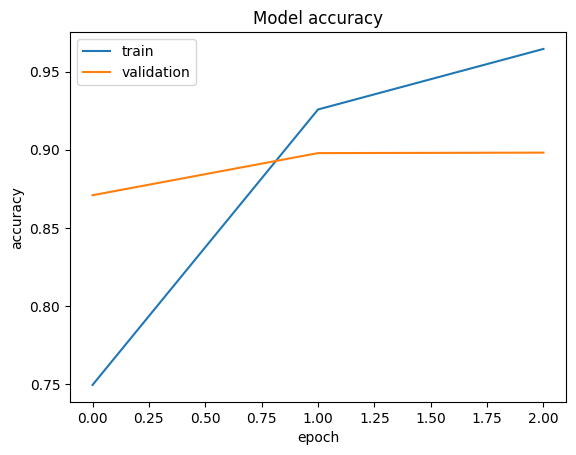

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['Accuracy'])
plt.plot(history.history['val_Accuracy'])

plt.title('Training and Validation Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train','Validation'], loc='upper left')
plt.show()


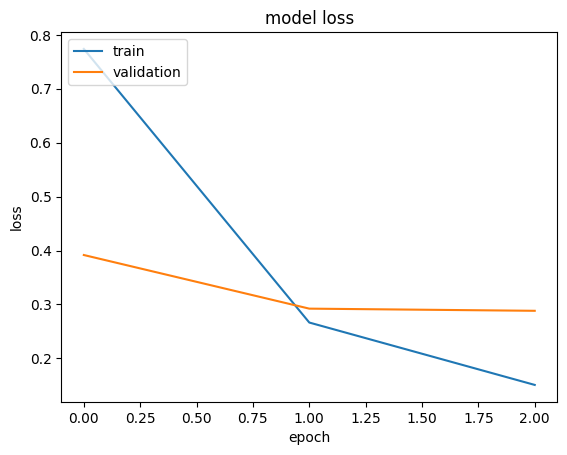

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.title('Training and Validation Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train','Validation'], loc='upper left')
plt.show()

In [ ]:
from keras.utils import to_categorical

# Convert labels to one-hot encoded format
y_test_encoded = to_categorical(y_test)
score = model.evaluate(X_test_padded, y_test_encoded, verbose=1)

print("Loss:", score[0])
print("Test Accuracy:", score[1])
print("Recall: ", score[2])
print("Percision: ", score[3])
print("F1score: ", score[4])
#testina bel exemple hay resultat najmou nzidouha fel etude comparati

748/748 [==============================] - 25s 31ms/step - loss: 0.3566 - Accuracy: 0.8546 - recall_: 0.8547 - precision_: 0.8547 - f1_score: 0.8547
Loss: 0.35657888650894165
Test Accuracy: 0.8546161651611328
Recall:  0.8546680212020874
Percision:  0.8546680212020874
F1score:  0.8546679615974426


In [ ]:
X_test_padded.shape, y_test_encoded.shape


((23916, 1187), (23916, 2))

In [ ]:
def predict(data):
  data = tokenizer.texts_to_sequences(data)
  data = pad_sequences(data, maxlen=1187,padding='post')
  predic = model.predict(data,batch_size=1)
  labels_t = ['This is a toxic comment','This is a non toxic comment']
  print(labels_t[np.argmin(predic)])

In [ ]:
data=['mama']
predict(data)

1/1 [==============================] - 1s 690ms/step
This is a non toxic comment


In [ ]:
data=['khayeb']
predict(data)

1/1 [==============================] - 0s 59ms/step
This is a toxic comment


In [ ]:
pred = model.predict(X_test_padded,batch_size = 128)

187/187 [==============================] - 10s 51ms/step


In [ ]:
test_data = aux_test['text']
test_id = aux_test['label']

data_test = pd.DataFrame(data = {'id' : test_id ,'text': X_test['text'], 'negative' : pred[:,1] ,'Positive' : pred[:,0]  })

In [ ]:
data_test

,id,text,negative,Positive
60034,0,cha3eb kolo su wasel 9ayedt inti5abet nenta5ba...,3.160539e-03,0.996839
40350,1,hethak 3lech rakza ken 3la et7in,6.059193e-01,0.394081
89192,0,اهلا منشيت كوراج,3.953508e-07,1.000000
4467,0,bsam rou3a,2.239726e-02,0.977603
119449,0,برافو,4.892565e-06,0.999995
...,...,...,...,...
56090,1,قناة الدعارة,9.998283e-01,0.000172
65060,0,raou enase boujouha simeihim oujouhihim wabi7a...,1.501653e-03,0.998498
112280,0,شنوة شديتو دوادي دوادي كان يحب يجي مرحبا و كان...,3.863830e-03,0.996136
34060,0,takhdam lifriki bkol sadak maghir hsabete tobk...,8.583797e-03,0.991416


In [ ]:
import pickle
with open('pcdtunizibert_pkl.pkl', 'wb') as files:
    pickle.dump(, files)

SyntaxError: invalid syntax (<ipython-input-80-6c6012635101>, line 3)